## Python statistics essential training - 04_03_bootstrapping

Standard imports

In [1]:
import math
import io

In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [3]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [4]:
path = 'data/grades.csv'
df = pd.read_csv(path)

In [5]:
df.head()

,grade
0,3.648651
1,5.959915
2,7.387370
3,4.047515
4,2.846912


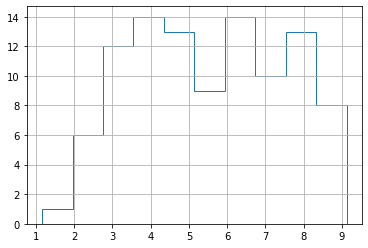

In [6]:
df.grade.hist(histtype='step')

In [7]:
df.describe()

,grade
count,100.000000
mean,5.508561
std,1.984988
min,1.160899
25%,3.921372
50%,5.688527
75%,7.272162
max,9.120705


In [8]:
df.sample(100,replace=True).describe()

,grade
count,100.000000
mean,5.221395
std,2.114423
min,1.160899
25%,3.460747
50%,5.485459
75%,6.717777
max,8.888042


In [11]:
bootstrap = pd.DataFrame({'meangrade': [df.sample(100,replace=True).grade.mean() for i in range(1000)]})

In [13]:
bootstrap.head()

,meangrade
0,5.571475
1,5.692377
2,5.616422
3,5.680038
4,5.758000


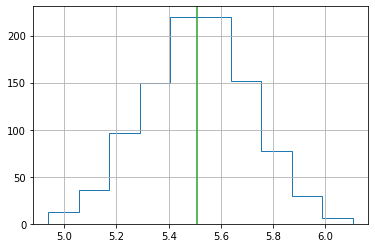

In [15]:
bootstrap.meangrade.hist(histtype='step')
pp.axvline(df.grade.mean(), color='C2')

In [16]:
bootstrap.meangrade.quantile(.025), bootstrap.meangrade.quantile(0.975)

(5.108588104698132, 5.890432720294564)

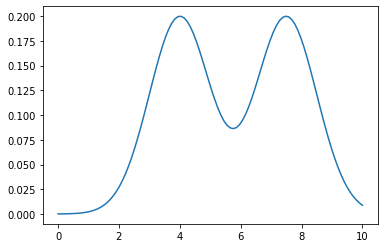

In [17]:
n1 = scipy.stats.norm(7.5,1)
n2 = scipy.stats.norm(4,1)

x = np.linspace(0,10,100)
pp.plot(x,.5*n1.pdf(x) + 0.5*n2.pdf(x))

In [18]:
def draw():
    while True: 
        v = n1.rvs() if np.random.rand() < 0.5 else n2.rvs()
        if 0 <= v <= 10:
            return v

In [19]:
draw()

6.808015805238001

In [20]:
def dataset(n=100):
    return pd.DataFrame({'grade': [draw() for i in range(n)]})

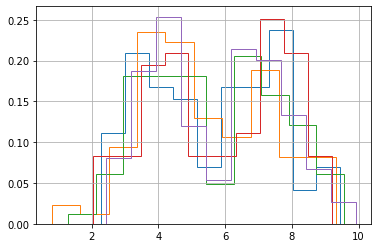

In [21]:
for i in range(5):
    dataset(100).grade.hist(histtype='step', density=True)

In [22]:
means = pd.DataFrame({'meangrade' : [dataset(100).grade.mean() for i in range(1000)]})

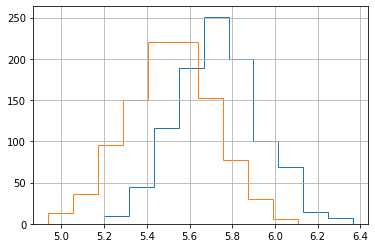

In [23]:
means.meangrade.hist(histtype='step')
bootstrap.meangrade.hist(histtype='step')